# Handwritten Digit Recognition
This tutorial guides you through a classic computer vision application: identify hand written digits with neural networks.

In [82]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import TensorBoard


Setting up some hyper-parameters (try others yourself)

In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

## Load data
We first fetch the MNIST dataset, which is a commonly used dataset for handwritten digit recognition. Each image in this dataset has been resized into 28x28 with grayscale value between 0 and 254. The following codes download and load the images and the according labels into numpy.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


### Installing additional modules ###
If you don't have Jupyther Themes installed, the following cell will fail. This is a good opportunity to learn how to add modules to your jupyter environment or to skip this cell for now (it is adding only small visual modifications).
If you decided to install the module open a terminal from the home page of jupyther (where you opened this notebook from) using the "new" button.

Run *pip install jupyterthemes*

If the next cell is still failing you are probably using conda to switch between different environments.

Run *source activate tensorflow_p27* (or any other environment you are using - see on the top right of your notebook)
and then *pip install jupyterthemes* again.

In [5]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

We plot the first 9 images and their classes

/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


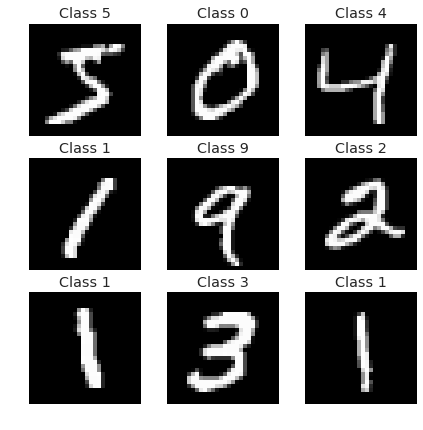

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.axis('off')
    
plt.show()

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network

Build the neural-network. Here we'll do a simple 3 layer fully connected network.
![DNN-Example](DNN-Example.png)


In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Connect to TensorBoard

In [11]:
tensorbaord = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
callbacks_list = [tensorbaord]

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [13]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, callbacks=callbacks_list,
                    validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0182 - acc: 0.9955 - val_loss: 0.1059 - val_acc: 0.9852
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0150 - acc: 0.9960 - val_loss: 0.1158 - val_acc: 0.9833
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0169 - acc: 0.9957 - val_loss: 0.1029 - val_acc: 0.9842
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0142 - acc: 0.9964 - val_loss: 0.1216 - val_acc: 0.9841
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0157 - acc: 0.9965 - val_loss: 0.1193 - val_acc: 0.9835
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0157 - acc: 0.9962 - val_loss: 0.1088 - val_acc: 0.9846
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0180 - acc: 0.9963 - val_loss: 0.1235 - val_acc

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
assert score[1] > 0.98

Test score: 0.125259650178
Test accuracy: 0.9842


## Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

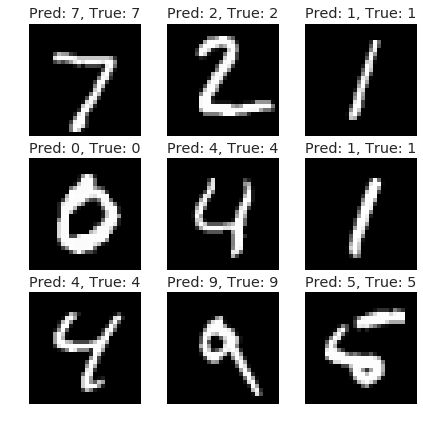

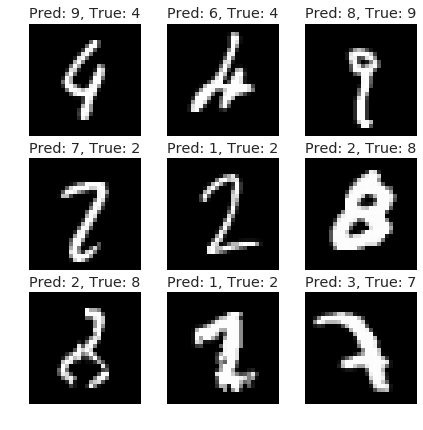

In [16]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, True: {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {}, True: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')
    
plt.show()

In [23]:
from IPython.display import HTML
import cv2
import numpy as np

def classify(img):
    img = img[len('data:image/png;base64,'):].decode('base64')
    img = cv2.imdecode(np.fromstring(img, np.uint8), -1)
    img = cv2.resize(img[3,:,:], (28,28))
    img = img.astype(np.float32).reshape((1,1,28,28))/255.0
    return model.predict(img)[0]


HTML(filename="keras/mnist_demo.html")

## Convolution
The results that we got from the previous model seems good (Test accuracy: 0.9842), but when we look at the examples that were misclassified, we can see that the mistakes are pretty bad. It is easy for us to see the right class.

This what leads us to use more advance symbols and the first one is the Convolution (Conv2D below)

In [19]:
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras import backend as K

In [20]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th' :
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [21]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [23]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Compile model.

We just need to compile the model and we'll be ready to train it. When we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fit model on training data.

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [25]:
model.fit(x_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.1962 - acc: 0.9396
Epoch 2/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0832 - acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0630 - acc: 0.9799
Epoch 4/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0530 - acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0468 - acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0410 - acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0360 - acc: 0.9889
Epoch 8/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0335 - acc: 0.9894
Epoch 9/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0300 - acc: 0.9902
Epoch 10/10
60000/60000 [==============================] - 15s 247us/step - loss: 

In [26]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0249914188285
Test accuracy: 0.9925


In [27]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

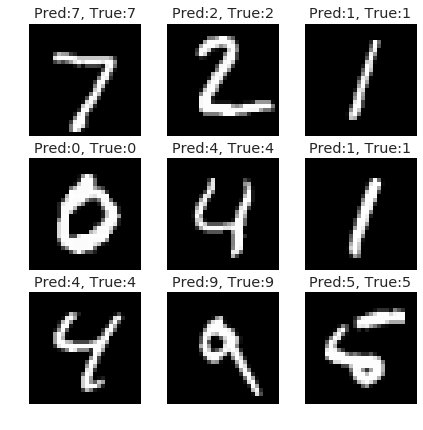

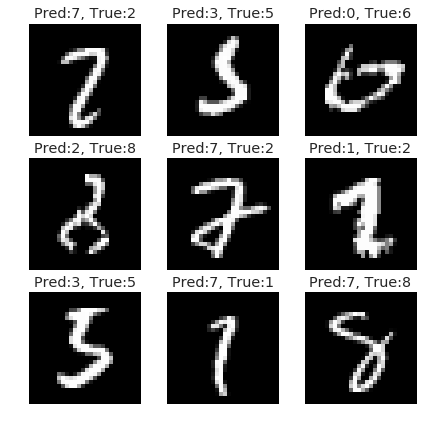

In [30]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred:{}, True:{}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred:{}, True:{}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')
    
plt.show()

### Confusion Matrix
Let's install a module directly from the notebook cell (no need to switch to the terminal), and then use the confusion matrix from scikit-learn library to better visualize the accuracy of the model as a whole.

Requirement already up-to-date: scikit-learn in /home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages


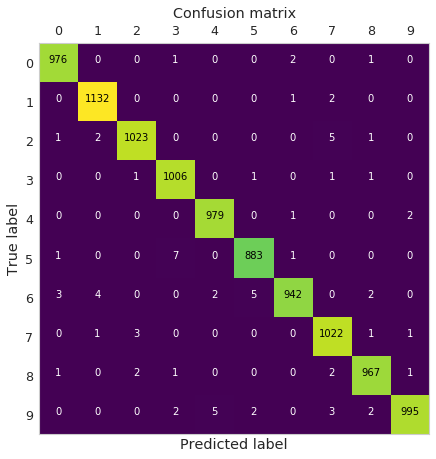

In [71]:
!pip install -U scikit-learn
import sklearn
import itertools
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.matshow(cm)
plt.title('Confusion matrix')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] < thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes = range(10) # Labels are sorted 
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.grid(False)
plt.show()

## RNN - LSTM version
To classify images using a recurrent neural network, we consider every image
row as a sequence of pixels. Because MNIST image shape is 28*28px, we will then
handle 28 sequences of 28 steps for every sample.

This example will actually use TensorFlow Directly (and not thorugh Keras as a high level API).

Let's start with library import and data loading

In [84]:
import tensorflow as tf
from tensorflow.contrib import rnn

# Get MNIST dataset
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [72]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

In [73]:
# LSTM Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

TensorFlow Training has a common stracture that starts with the definition of the Placeholder for input and the parameters that will used

In [76]:
# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}


Next we define the flow through the symbols of the (R)NN

In [78]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

Next we define the operators/functions that we will use in the TF training session

In [79]:
logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Next we initilize the variable of the session and running with sess.run

In [111]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 10000
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    test_predictions = prediction.eval(feed_dict = {X:test_data})
    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

Step 1, Minibatch Loss= 3.1521, Training Accuracy= 0.086
Step 200, Minibatch Loss= 2.0623, Training Accuracy= 0.328
Step 400, Minibatch Loss= 1.8582, Training Accuracy= 0.352
Step 600, Minibatch Loss= 1.8533, Training Accuracy= 0.391
Step 800, Minibatch Loss= 1.5600, Training Accuracy= 0.492
Step 1000, Minibatch Loss= 1.5482, Training Accuracy= 0.523
Step 1200, Minibatch Loss= 1.3848, Training Accuracy= 0.562
Step 1400, Minibatch Loss= 1.4024, Training Accuracy= 0.602
Step 1600, Minibatch Loss= 1.3761, Training Accuracy= 0.547
Step 1800, Minibatch Loss= 1.3575, Training Accuracy= 0.547
Step 2000, Minibatch Loss= 1.5862, Training Accuracy= 0.500
Step 2200, Minibatch Loss= 1.3042, Training Accuracy= 0.578
Step 2400, Minibatch Loss= 1.1115, Training Accuracy= 0.633
Step 2600, Minibatch Loss= 1.0729, Training Accuracy= 0.656
Step 2800, Minibatch Loss= 1.0507, Training Accuracy= 0.656
Step 3000, Minibatch Loss= 1.0772, Training Accuracy= 0.703
Step 3200, Minibatch Loss= 1.0471, Training Acc

We will calculate the confusion matrix

In [112]:
test_true = tf.argmax(test_label,1)
test_pred = tf.argmax(test_predictions,1)
confusion = tf.confusion_matrix(labels=test_true, predictions=test_pred)

Tensor("confusion_matrix_7/SparseTensorDenseAdd:0", shape=(?, ?), dtype=int32)


and extract the values as a matrix for plotting

In [114]:
with tf.Session():
   cm = tf.Tensor.eval(confusion,feed_dict=None, session=None)

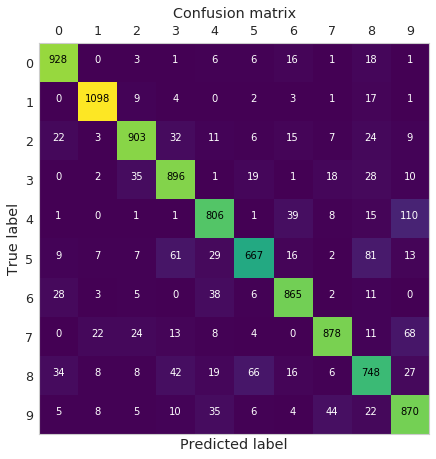

In [115]:
plt.matshow(cm)
plt.title('Confusion matrix')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] < thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
classes = range(10) # Labels are sorted 
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.grid(False)
plt.show()